# Analyzing NDVI

In [1]:
import geopandas as gpd
import numpy as np
import folium
import rasterio
from functools import reduce
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import rasterio
# to calculate ndvi locally 
#import earthpy.spatial as es
import os

# Explore the images we exported from Sentinel-2

In [2]:
# Set the paths to our data dir
data_before_dir = 'D:/dl_data/kenya_before'
data_after_dir = 'D:/dl_data/kenya_after'

In [116]:
raster_before = rasterio.open(data_before_dir + '/' + 'kenya_aoi_before (233).tif')
raster_after = rasterio.open(data_after_dir + '/' + 'kenya_aoi_after (233).tif')

In [117]:
print(raster_before.shape)
print(raster_after.shape)

(154, 154)
(154, 154)


#### list of the bands
bands = raster_before.descriptions
print(len(bands))

In [118]:
red_before = raster_before.read(4)
green_before = raster_before.read(3)
blue_before = raster_before.read(2)
nir_before = raster_before.read(8)
ndvi_before = raster_before.read(17)
#ndvi_before = (nir_before.astype(float)-red_before.astype(float)) / (nir_before + red_before)

'''red_during = raster_during.read(4)
green_during = raster_during.read(3)
blue_during = raster_during.read(2)
nir_during = raster_during.read(8)
ndvi_during = raster_during.read(17)
ndvi_during = (nir_during.astype(float)-red_during.astype(float)) / (nir_during + red_during)
'''
red_after = raster_after.read(4)
green_after = raster_after.read(3)
blue_after = raster_after.read(2)
nir_after = raster_after.read(8)
ndvi_after = raster_after.read(17)
#ndvi_after = (nir_after.astype(float)-red_after.astype(float)) / (nir_after + red_after)

In [119]:
print(raster_before.bounds==raster_after.bounds)
print(raster_after.bounds)

True
BoundingBox(left=39.976736942358535, bottom=0.42831672746818783, right=39.990570997733975, top=0.44215078284362846)


In [120]:
red_after.dtype

dtype('float32')

In [123]:
# scale the values for display purposes
def normalize(band):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

bluen_before, bluen_after = normalize(blue_before), normalize(blue_after)
greenn_before, greenn_after = normalize(green_before), normalize(green_after)
redn_before, redn_after  = normalize(red_before), normalize(red_after)
nirn_before, nirn_after = normalize(nir_before), normalize(nir_after)


In [124]:
# Visualize the image
# Use numpy array to stack two stacks of bands

rgb_before, rgb_after = np.dstack((redn_before, greenn_before, bluen_before)), np.dstack((redn_after, greenn_after, bluen_after))
nrg_before, nrg_after = np.dstack((nirn_before, redn_before, greenn_before)), np.dstack((nirn_after, redn_after, greenn_after))


Text(0.5, 1.0, 'RGB After')

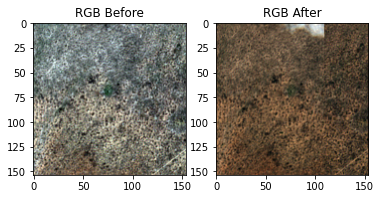

In [125]:
# Checking out the image in real colors
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(rgb_before)
ax.set_title('RGB Before')


ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(rgb_after)
ax.set_title('RGB After')

## Taking a look at our NDVI

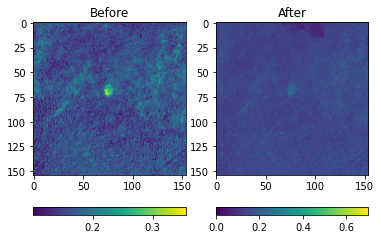

In [126]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(ndvi_before)
ax.set_title('Before')
plt.colorbar(orientation='horizontal')

'''ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(ndvi_during)
imgplot.set_clim(0.0, 0.7)
ax.set_title('During')
plt.colorbar(orientation='horizontal')'''

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(ndvi_after)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(orientation='horizontal')

In [127]:
print(f"The sum of vegetation pixels before the attack : {np.sum(ndvi_before)}")
print(f"The sum of vegetation pixels after the attack : {np.sum(ndvi_after)}")

The sum of vegetation pixels before the attack : 3923.85009765625
The sum of vegetation pixels after the attack : 3579.66552734375


The previous is not a good way to assess the vegetation condition for before and after because it takes into account the whole vegetaion values including the low while we are looking for the affects on the high vegetation areas.

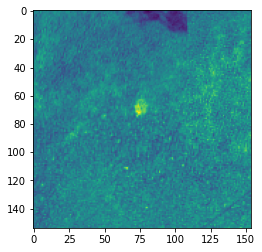

In [128]:
ndvi_diff = ndvi_before - ndvi_after
fig = plt.imshow(ndvi_after)

plt.show()

## Create Vegetation Masks

In [141]:
# Create different ndvi masks
def create_mask(ndvi_array, min_value, max_value):
    cmap = plt.cm.gray
    norm = plt.Normalize(vmin= min_value, vmax=max_value)

    # map the normalized data to colors
    # image is now RGBA (512x512x4) 
    mask = cmap(norm(ndvi_array))
    #save the image
    #plt.imsave(f'/content/drive/My Drive/Thakara_vegetation_masks/mid_high_canopy.png', mid_high_canopy, cmap=cmap)
    return mask


mid_high_canopy_before = create_mask(ndvi_before, 0.2, 1.0)
mid_high_canopy_after = create_mask(ndvi_after, 0.2, 1.0)



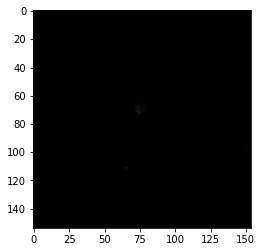

In [142]:
# Checking out our ndvi image diffirent thresholds
fig = plt.imshow(mid_high_canopy_after)

plt.show()

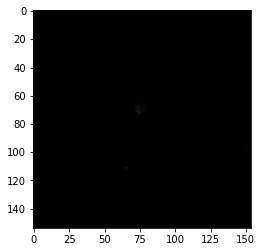

In [143]:
# Checking out our ndvi image diffirent thresholds
fig = plt.imshow(mid_high_canopy_after)

plt.show()

In [144]:
print(f"The sum of vegetation pixels before the attack : {np.sum(mid_high_canopy_before)}")
print(f"The sum of vegetation pixels after the attack : {np.sum(mid_high_canopy_after)}")

The sum of vegetation pixels before the attack : 23764.12941176471
The sum of vegetation pixels after the attack : 23727.0


Here we can notice a drop in the high vegetation values after the attack